<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/solutions/PSO_cv02_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Lab - Notebook widgets

In this lab we will cover some ways in which you can make the output of the notebook more interactive.

First we will download an image.

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Malachite_kingfisher_%28Corythornis_cristatus_stuartkeithi%29.jpg/480px-Malachite_kingfisher_%28Corythornis_cristatus_stuartkeithi%29.jpg'
!mv '480px-Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg' bird.jpg
!ls -l

--2023-09-19 11:20:45--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Malachite_kingfisher_%28Corythornis_cristatus_stuartkeithi%29.jpg/480px-Malachite_kingfisher_%28Corythornis_cristatus_stuartkeithi%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42974 (42K) [image/jpeg]
Saving to: ‘480px-Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’

480px-Malachite_kin 100%[===================>]  41.97K  --.-KB/s    in 0.002s  

2023-09-19 11:20:45 (21.0 MB/s) - ‘480px-Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’ saved [42974/42974]

total 48
-rw-r--r-- 1 root root 42974 Jan 20  2022 bird.jpg
drwxr-xr-x 1 root root  4096 Sep 15 13:22 sample_data


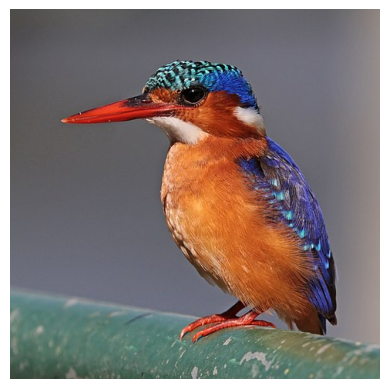

In [ ]:
import cv2
import matplotlib.pyplot as plt
img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.axis('off')
plt.show()

## Note on image representation

We can represent images in two ways we either use the 8-bit unsigned integer for every channel of every pixel, or we use flouting point numbers.

With uint8 the range is 0 to 255, but with floats the common libraries for displaying images assume that the image is in range 0.0 to 1.0.

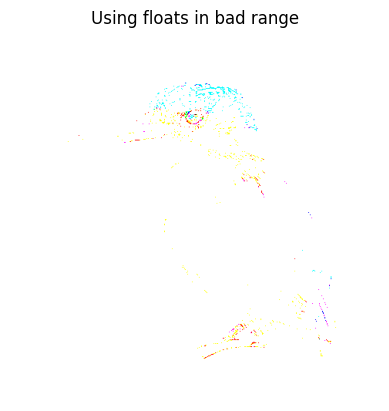

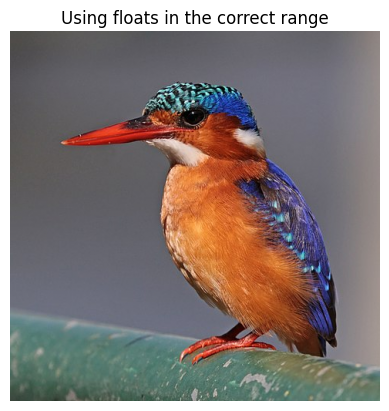

In [ ]:
img_f_bad = img_b.astype(float)
plt.imshow(img_f_bad[:,:,::-1])
plt.title("Using floats in bad range")
plt.axis('off')
plt.show()

img_f_good = img_b.astype(float) / 255.0
plt.imshow(img_f_good[:,:,::-1])
plt.title("Using floats in the correct range")
plt.axis('off')
plt.show()


## ipympl

The ipympl library enables the use of interactive UI elements and plots in jupyter notebooks. We first have to install it.

After installation we enable it in Google Colab.

Matplotlib uses different backends to create display elements. We therefore have to apply a magic to switch the backend.

In [ ]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00


In [ ]:
%matplotlib ipympl

Notice that now we get an interactive plot where we can move around the plot and zoom in and out.

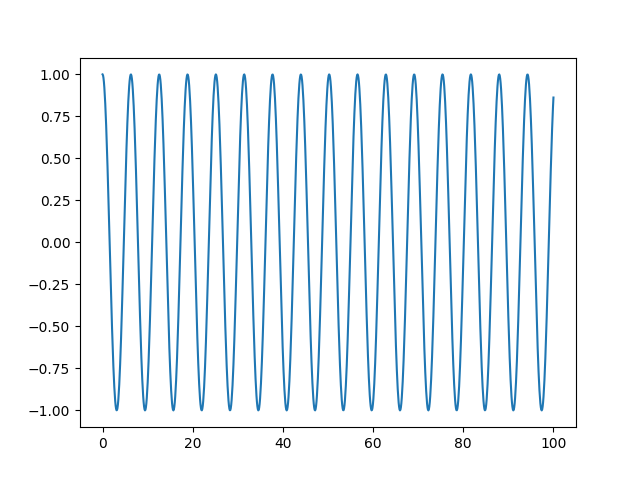

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 100.0, 1000)
plt.figure()
plt.plot(x, np.cos(x))
plt.show()

### Capturing clicks

One of the possible uses of ipympl is click capture. Note that in order to do this we first have to create a `Figure` object. Previously this has been done implicitly. The clicks then create an event which carries information about the click.

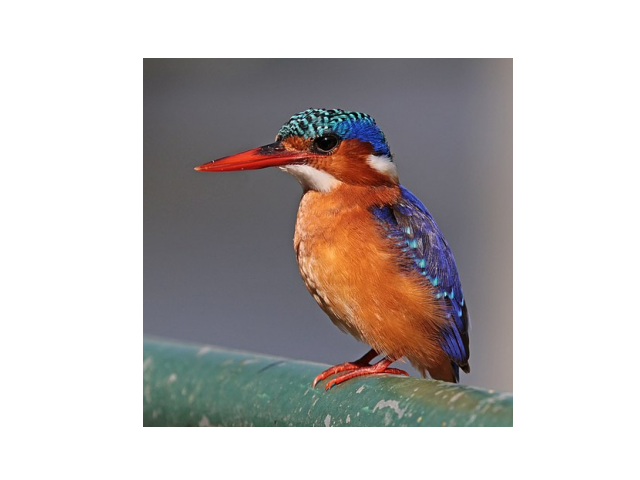

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
plt.axis('off')
plt.imshow(img_b[:,:,::-1])
plt.show()

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

### Exercise 1 - Cropping an image

In this exercise your goal is to modify the previous script. To show the image of the bird. The user can then first click on the image to indicate the top-left corner of a new crop of the image. When the user clicks the second time, the position is used as the bottom-right corner for the crop and the crop is then shown as a separate figure.

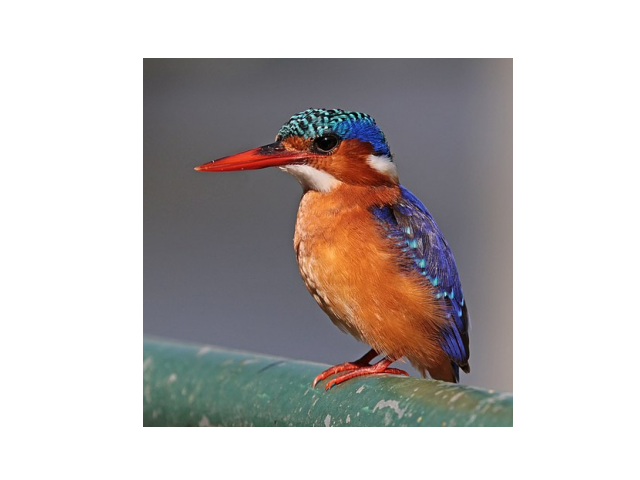

Upper Left Corner Selected
Lower Right Corner Selected


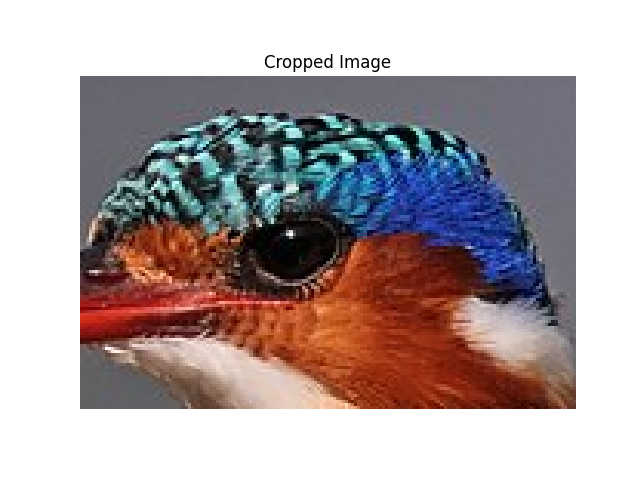

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
plt.axis('off')
plt.imshow(img_b[:,:,::-1])
plt.show()

points = []

def crop_img(img, points):
  x_start = int(points[0][0])
  y_start = int(points[0][1])
  x_end = int(points[1][0])
  y_end = int(points[1][1])

  cropped = img[y_start:y_end, x_start: x_end]

  plt.figure()
  plt.imshow(cropped[:, :, ::-1])
  plt.title('Cropped Image')
  plt.axis('off')
  plt.show()

def onclick(event):
    if len(points) >= 2:
        print("Already cropped")
    ix, iy = event.xdata, event.ydata
    points.append((ix, iy))
    if len(points) == 1:
      print("Upper Left Corner Selected")
    if len(points) == 2:
      print("Lower Right Corner Selected")
      crop_img(img_b, points)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

### UI elements

Ipympl can also include UI elements. These elements can be used to interact with the notebook without including code.

In the example below we have a slider which calls a function upon the change of the values. The figure is then updated.

To show the various elements in a nice way we also use a layout.

**Note:** It is possible to update the figure by calling `fig.plot(...)`, but this is less efficient. We therefore keep the variable representing the individual plots (lines) in the figure and simply change the underlying data. To update the figure we have to call the `draw()` method of its `canvas`. Note that we use canvas since the figure itself refers to the actual image (png) while the canvas refers to the interactive element.



In [ ]:
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

layout = AppLayout(center=fig.canvas, footer=slider, pane_heights=[0, 6, 1])
display(layout)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer'), max=2.0, …

### Exercise 2 - RGB sliders

In this exercise your task is to build a UI such that it shows an image of the bird, with three sliders for each channel R, G, B in ranges from 0 to 2.0. When the user modifies one of the sliders the given image channel is multiplied by the slider value and the image is displayed. Note that you have to keep the original image in the memory so you do not perform the multiplication over and over again. The UI should also include a reset button which resets the sliders.

ipympl actually uses ipywidgets so in order to finish this exercise you might want to have a look at [its documentation](https://ipywidgets.readthedocs.io/en/stable/). You will need to find out how to use a button and use a more sohpisticated layouts.

**Note - redrawing** As with the previous example. Creating a new figure every time you want to draw something is not efficient. To change the image in an existing figure you want to use the following:


```
# create a figure and draw original image
fig = plt.figure()
img_axes = plt.imshow(img[:, :, ::-1])
plt.show()

# change the data
img_axes.set_data(img_new[:, :, ::-1])
fig.canvas.draw()
fig.canvas.flush_events()
```

**Note - memory** When trying to implement the code you might run into issues with high memory usage since unused plots may still be kept in memory. To close all plots simply call `plt.close('all')`. It is recommmended to call this at the start of the cell.






In [ ]:
from ipywidgets import AppLayout, FloatSlider, GridspecLayout, Button

plt.close('all')

slider_r = FloatSlider(
    orientation='horizontal',
    description='R:',
    value=1.0,
    min=0.0,
    max=2.0
)

slider_g = FloatSlider(
    orientation='horizontal',
    description='G:',
    value=1.0,
    min=0.0,
    max=2.0
)

slider_b = FloatSlider(
    orientation='horizontal',
    description='B:',
    value=1.0,
    min=0.0,
    max=2.0
)


fig, axes = plt.subplots()
plt.axis('off')
img_axes = plt.imshow(img_b[:, :, ::-1])

def update(_):
    img_new = np.copy(img_b).astype(float) / 255.0
    img_new[:, :, 0] *= slider_b.value
    img_new[:, :, 1] *= slider_g.value
    img_new[:, :, 2] *= slider_r.value
    img_axes.set_data(img_new[:, :, ::-1])
    fig.canvas.draw()
    fig.canvas.flush_events()

slider_r.observe(update, names='value')
slider_g.observe(update, names='value')
slider_b.observe(update, names='value')

button = Button(
    description='Reset',
    disabled=False,
    tooltip='Click me',
)

def on_button_clicked(b):
    print("Sliders reset!")
    slider_r.value = 1.0
    slider_g.value = 1.0
    slider_b.value = 1.0


button.on_click(on_button_clicked)

grid = GridspecLayout(4, 1)

grid[0, 0] = slider_r
grid[1, 0] = slider_g
grid[2, 0] = slider_b
grid[3, 0] = button

AppLayout(center=fig.canvas, footer=grid, pane_heights=[0, 3, 1])

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=1.0, description='R:', layout=Layout(grid_area=…

Sliders reset!
